# Supervised classification


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression


In the data.csv there are letters (uppercases and lowercases) and numbers in a row format, in the cell below load the **data_all.csv** and explore it.


In [2]:
# Your code here
df = pd.read_csv('data_all.csv')

In [3]:
df.head(10)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116322 entries, 0 to 116321
Columns: 785 entries, e to 784
dtypes: float64(785)
memory usage: 696.7 MB


In [5]:
df.e.value_counts()

1.0     6330
7.0     6139
3.0     5969
2.0     5869
0.0     5778
        ... 
41.0     400
20.0     382
60.0     381
51.0     368
45.0     317
Name: e, Length: 62, dtype: int64

In [6]:
df.columns

Index(['e', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '775', '776', '777', '778', '779', '780', '781', '782', '783', '784'],
      dtype='object', length=785)

In [7]:
df.describe()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,116322.000000,116322.0,116322.0,116322.0,116322.0,116322.000000,116322.000000,116322.000000,116322.000000,116322.000000,...,116322.000000,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0,116322.0
mean,19.252695,0.0,0.0,0.0,0.0,0.000009,0.001083,0.002141,0.002149,0.001788,...,0.000172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,17.817294,0.0,0.0,0.0,0.0,0.002932,0.369436,0.730077,0.733009,0.609863,...,0.058641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,10.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,32.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,61.000000,0.0,0.0,0.0,0.0,1.000000,126.000000,249.000000,250.000000,208.000000,...,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Now than you had identified your data, try to define your X and y (target) for next classification models.

In [12]:
# Your code here
X = np.array(df.drop(columns='e'))
y = np.array(df.e)

In [13]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Before applying any model, you need to know which labels are which, to solve this you need to reshape your X-dataset into 28x28 pixels in a variable called `x_images`. <br> **Hint:** You can use *np.reshape(size of data, 28, 28))*

In [14]:
# Your code here
x_images = X.reshape(X.shape[0], 28, 28)

In [15]:
X.shape

(116322, 784)

In this way, you need to visualize some data to realize which number-labels represents a letter or a number.
<br> **Hint:** You can use *plt.imshow()*

In [81]:
# Your code here
X.shape[0]

116322

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

In [17]:
df.e.unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

In [24]:
sorted(list(df.e.unique()))[:]

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0]

41.0 is:


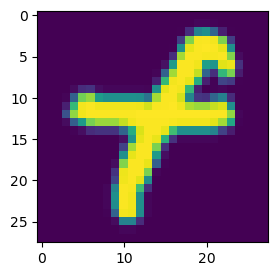

42.0 is:


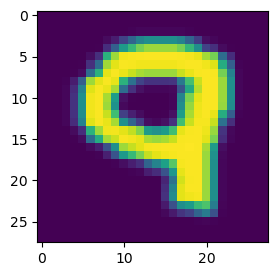

43.0 is:


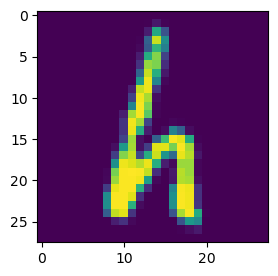

44.0 is:


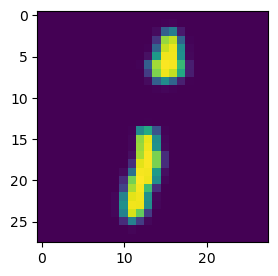

45.0 is:


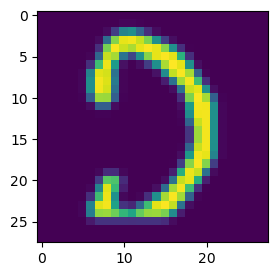

46.0 is:


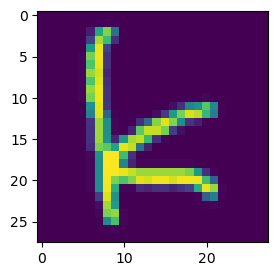

47.0 is:


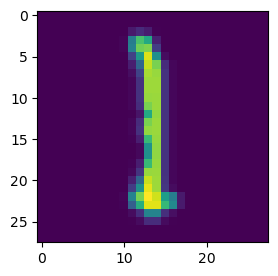

48.0 is:


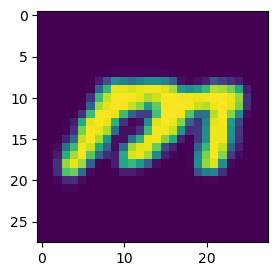

49.0 is:


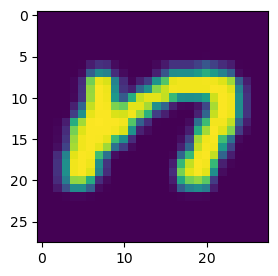

50.0 is:


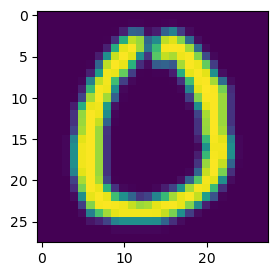

51.0 is:


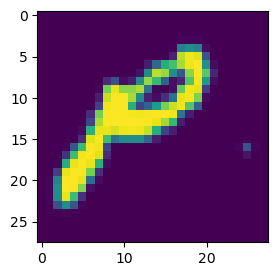

52.0 is:


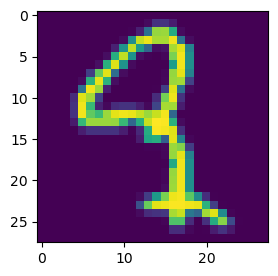

53.0 is:


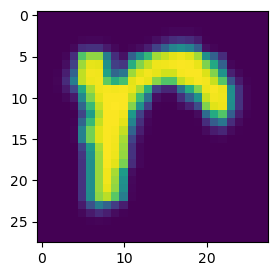

54.0 is:


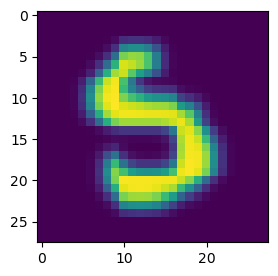

55.0 is:


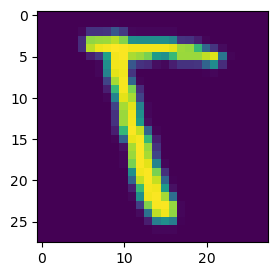

56.0 is:


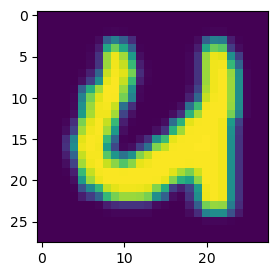

57.0 is:


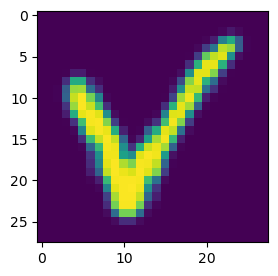

58.0 is:


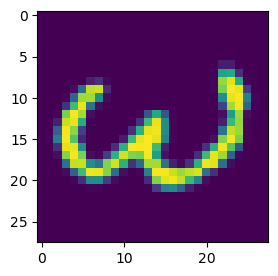

59.0 is:


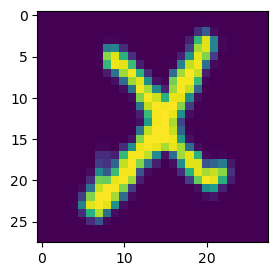

60.0 is:


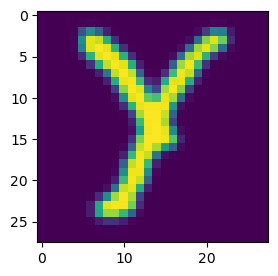

61.0 is:


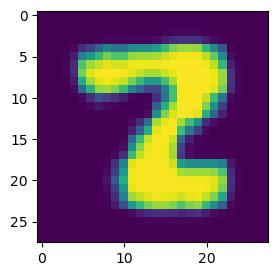

In [35]:
for j in sorted(list(df.e.unique()))[41:62]:
    i = df[df.e == j].index[0]
    print(y[i],'is:')
    plt.figure(figsize=(3,3))
    plt.imshow(x_images[i])
    plt.show()

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [115]:
lista_nueva=[]

for x in y:
    x=int(x)
    if (x > 9) & (x < 36):
        lista_nueva.append(1)
    else:
        lista_nueva.append(0)

In [116]:
lista_nueva[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [118]:
y_2_uper = pd.DataFrame(lista_nueva)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [120]:
best_forest = RandomForestClassifier(max_depth=12, n_estimators=150 ).fit(X_train, y_train[0])

In [121]:
y_pred = best_forest.predict(X_train)

accuracy_score(y_train, y_pred)

0.8766562429478707

In [122]:
y_pred_test = best_forest.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.7909305824199441

# ESTE EJEMPLO ES PARA REALIZAR UNA CLASIFICACION DE LOS 3 CASOS, NUMEROS, MAYUSCULAS Y MINUSCULAS

In [123]:
# Your code here
list(y)[:10]

[36.0, 0.0, 3.0, 33.0, 30.0, 24.0, 40.0, 5.0, 8.0, 2.0]

In [124]:
lista_nueva=[]
for x in y:
    x=int(x)
    if x < 10:
        lista_nueva.append(0)
    if (x > 9) & (x < 36):
        lista_nueva.append(1)
    if x > 35:
        lista_nueva.append(2)

In [125]:
lista_nueva[:10]

[2, 0, 0, 1, 1, 1, 2, 0, 0, 0]

In [126]:
y_2 = pd.DataFrame(lista_nueva)

In [127]:
y_2[0]

0         2
1         0
2         0
3         1
4         1
         ..
116317    0
116318    2
116319    1
116320    0
116321    0
Name: 0, Length: 116322, dtype: int64

In [128]:
X_2 = df.drop(columns='e')

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [132]:
forest = RandomForestClassifier()
params = {'max_depth': [10,12, 15], 'n_estimators':[100,150]}
grid_forest = GridSearchCV(forest, params).fit(X_train, y_train[0])

In [133]:
grid_forest.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=150)

In [78]:
grid_forest.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=80)

In [134]:
best_forest = RandomForestClassifier(max_depth=15, n_estimators=150 ).fit(X_train, y_train[0])

In [81]:
from sklearn.metrics import accuracy_score

In [88]:
y_pred = best_forest.predict(X_train)

accuracy_score(y_train, y_pred)

0.877225786346003

In [135]:
y_pred_test = best_forest.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.8054588437567161

* Try to do the same thing with lowercases.

In [98]:
# Your code here
lista_nueva=[]
for x in y:
    x=int(x)
    if x > 35:
        lista_nueva.append(1)
    else:
        lista_nueva.append(0)

In [101]:
lista_nueva[:10]

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [102]:
y_2_lower = pd.DataFrame(lista_nueva)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2_lower, test_size=0.2, random_state=42)

In [104]:
best_forest = RandomForestClassifier(max_depth=12, n_estimators=150 ).fit(X_train, y_train[0])

In [105]:
y_pred = best_forest.predict(X_train)

accuracy_score(y_train, y_pred)

0.9194687127244592

In [106]:
y_pred_test = best_forest.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.8744895766172361

* Try to do the same thing with numbers.

In [91]:
# Your code here
lista_nueva=[]
for x in y:
    x=int(x)
    if x < 10:
        lista_nueva.append(1)
    else:
        lista_nueva.append(0)

In [92]:
lista_nueva[:10]

[0, 1, 1, 0, 0, 0, 0, 1, 1, 1]

In [93]:
y_2_num = pd.DataFrame(lista_nueva)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2_num, test_size=0.2, random_state=42)

In [95]:
best_forest = RandomForestClassifier(max_depth=12, n_estimators=150 ).fit(X_train, y_train[0])

In [96]:
y_pred = best_forest.predict(X_train)

accuracy_score(y_train, y_pred)

0.9247880331409781

In [97]:
y_pred_test = best_forest.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.8656780571674189